# (Ford gobike share system insights)
## by (Ahmed Lotfy)

## Investigation Overview

> The Following visuals focus on 2 Main Variables: "User type" and "Duration" and what are the features that interact with.

## Dataset Overview

> "This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area" for the period of Februry 2019.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import math
%matplotlib inline

from scipy.stats import norm
from matplotlib import rcParams
# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
ford_bike_share= pd.read_csv("Master_ford_bike_share.csv")

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Univariate Exploration:

## 1- the distribution of main variable of interest: "Duration" .



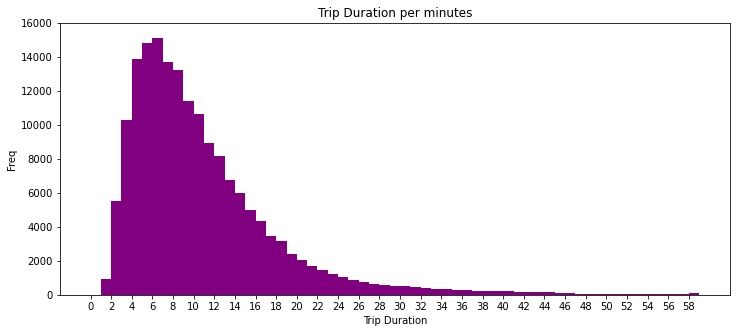

In [3]:
# Set the figure coordinates:
# Specify the figure size in inches, for both X, and Y axes:
# *******
# https://classroom.udacity.com/nanodegrees/nd002-mena-nfp3/parts/211104e3-a5bc-4247-87b7-06bfa757806c/modules/884648ee-be0a-4bde-853f-26e97458edc8/lessons/b86503df-e416-4f0e-9e2d-a7a3c08d0bc3/concepts/bd9948e9-eda5-48b7-8c6f-e97192a9ac48
# *******
plt.rcParams['figure.figsize'] = 12, 5

# Set the bins and ticks range:
bins= np.arange(0, 60, 1)
ticks = np.arange(0, 60, 2)

plt.hist(data=ford_bike_share, x="duration_in_minutes", bins=bins, rwidth= 1, color= "purple");
plt.xticks(ticks, ticks);
plt.ylim(0, 16000);
plt.xlabel("Trip Duration");
plt.ylabel("Freq");
plt.title("Trip Duration per minutes");

> - **Visual insight**:

- Since trip duration distribution has right skwed shape which means that lots of points refer to low values, with a very long tail of points refer to large values: Most trips duration approximately in range (3-12) minutes. And very few trips duration lasted more than one hour (60 minutes).

## 2- "Time of trip" distribution :"Start hour of the day" & "End hour of the day" distributions.

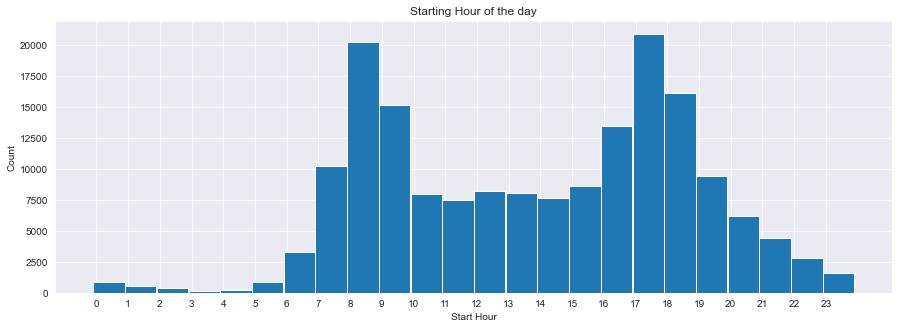

In [4]:
# Define the figure size
plt.figure(figsize = [15, 5])
sb.set_style("darkgrid")
bin_edges = np.arange(-0.1, 23.59+1, 1)
plt.hist(data = ford_bike_share, x = "st_hour", bins = bin_edges, rwidth = 0.99)
plt.xticks(np.arange(0, 23+1, 1))
plt.xlabel("Start Hour");
plt.ylabel("Count")
plt.title("Starting Hour of the day");

> **Visual insight:**

- The distribution seems roughly bimodal (has two peaks) at (8 AM) and (5 PM). Further specified analysis could examine if that correlated to factor of being most of work days start and end around thoes times.

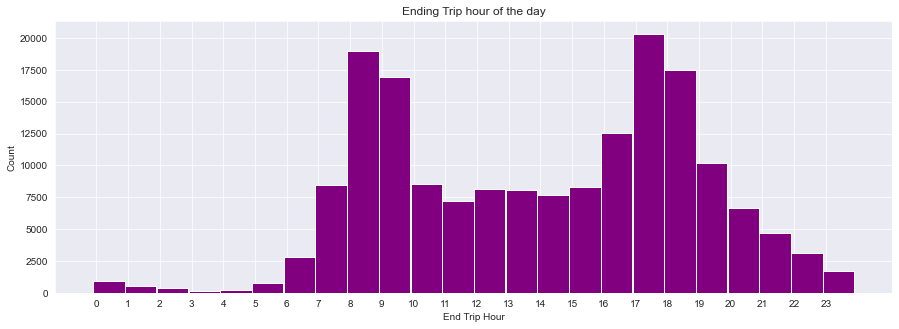

In [5]:
# Define the figure size
plt.figure(figsize = [15, 5])

bin_edges = np.arange(-0.1, 23.59+1, 1)
plt.hist(data = ford_bike_share, x = "en_hour", bins = bin_edges, rwidth = 0.99, color= "purple")
plt.xticks(np.arange(0, 23+1, 1))
plt.xlabel("End Trip Hour");
plt.ylabel("Count");
plt.title("Ending Trip hour of the day");

> **Visual insight:**
- The distribution of end trips hours also seems roughly bimodal (has two peaks) at (8 AM) and (5 PM). Which supports the Further specified analysis hypothesis that suggests: there is a positive correlation between times of trips and being most of work days start and end around those times.

## 3- "Date of trips" distribution: "Start day of the week" distributions



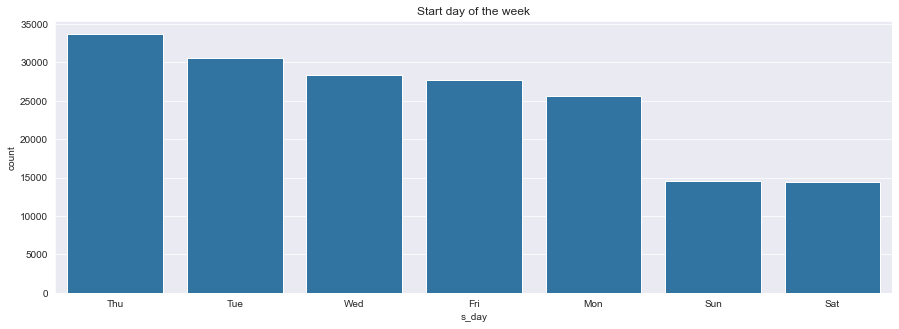

In [6]:
# Plotting using seaborn countplot:
plt.figure(figsize = [15, 5])
base_color = sb.color_palette()[0]
# The order of the display of the bars can be computed with the following logic.
# Count the frequency of each unique value in the 'generation_id' column, and sort it in descending order
# Returns a Series
freq = ford_bike_share["s_day"].value_counts()

# Get the indexes of the Series
gen_order = freq.index

# Plot the bar chart in the decreasing order of the frequency of the `generation_id`
sb.countplot(data=ford_bike_share, x="s_day",color= base_color, order=gen_order);

plt.title("Start day of the week");

> **Visual insight:**
- The distribution of "start day of week" trips date also seems related to "work days" [Monday-Friday] which supports giving priority to "going to Work" as a main purpose of using "ford gobike" service.

## 4- Ages of users" distributions



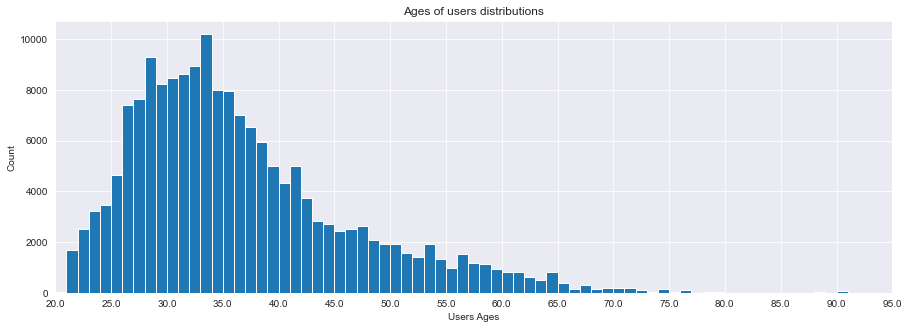

In [7]:
# Plottin hist graph:
plt.figure(figsize = [15, 5])
bins = np.arange(-5, ford_bike_share["user_age"].max()+5, 1)
ticks= np.arange(-5, ford_bike_share["user_age"].max()+5, 5)
plt.hist(data=ford_bike_share, x="user_age", bins=bins);
plt.xticks(ticks, ticks);
plt.xlim(20, 95);
plt.xlabel("Users Ages");
plt.ylabel("Count");
plt.title("Ages of users distributions");

 ##### Also we can look at that croped graph

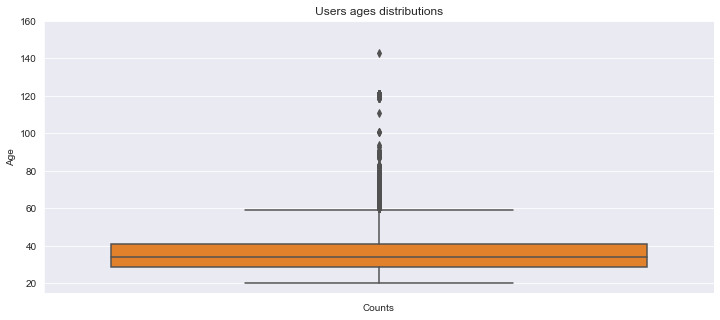

In [8]:
base_color = sb.color_palette()[1]
sb.boxplot(data = ford_bike_share, y = "user_age", color = base_color, whis= 1.5)
plt.title("Users ages distributions")
plt.xlabel("Counts")
plt.ylim(15,160)
plt.ylabel("Age")
plt.show()

> **Visual insight:**
- "Users ages" approximately seems in range (20 - 60) with few higher values outliers, about 75% of users is less than 40 years old, and 90% less than 60 years old which support the suggestion of going to work is a main purpose of using "ford gobike" service. 

# Bivariate Exploration

> I will go first with the User-wise prospective so i will focus first on:
- User type VS duration per minutes.
- User type VS Date.
- User type Vs Age

### 1- User type Vs duration per minutes distributions:

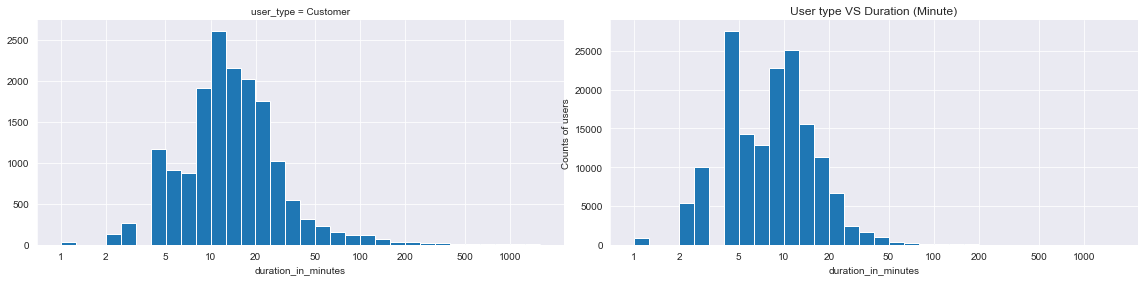

In [9]:
# Plotting using faceted graph for User types Vs Duration per minutes:
bin_edges = 10 ** np.arange(0.0, np.log10(ford_bike_share.duration_in_minutes.max())+0.1, 0.1)

ut = sb.FacetGrid(data = ford_bike_share, col = "user_type", height=4, aspect=2, 
                 col_order = None, sharey=False, sharex= True, margin_titles=False)
ut.map(plt.hist, "duration_in_minutes", bins = bin_edges)
plt.xscale("log")
tick_locs = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]
plt.xticks(tick_locs, tick_locs)
plt.ylabel("Counts of users");
plt.title("User type VS Duration (Minute)");

> **Visual insight:**

**Subscriber user type:**

Duration of trips for Subscribers mostly in range (5-12) minutes. while:

**Customer user type**

Mostly rode in range (8-20) minutes which surprisingly is longer range . Also customers seems likely to last more than one hour compared to subscribers.

It seems like subscribers have a more specific usage or targeted porpused riding the bikes compared to customers who vary more.

### 2- User type Vs Date [day of the week]:

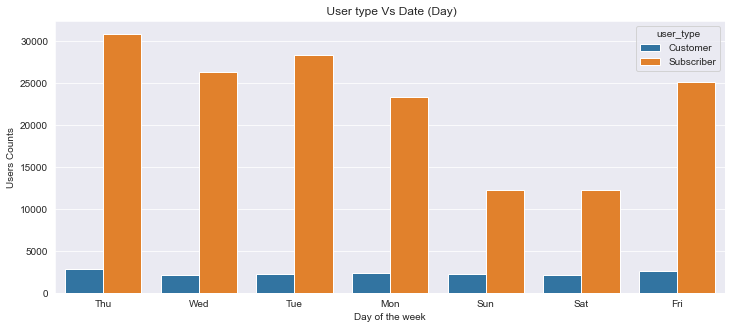

In [10]:
# Plotting countplot to compare numbers of users throw every week's day
sb.countplot(data=ford_bike_share, x="s_day", hue="user_type");
plt.xlabel("Day of the week");
plt.ylabel("Users Counts")
plt.title(" User type Vs Date (Day)");

> **Visual insight:**

**Customers**

seem to have a roughly uniform pattern of using the "ford gobike" service through all weekdays. while


**Subscribers **

seem to have a dual pattern of using the "ford gobike" service through all weekdays, large amount of subscribers uses the service through [Mondays - fridays] but on [Suterdays- Sundays] number of subscribers who uses the service falls down, which supports the hypothesis of "going to work" as a main motive for subscribers.

### 3- User type Vs Age:

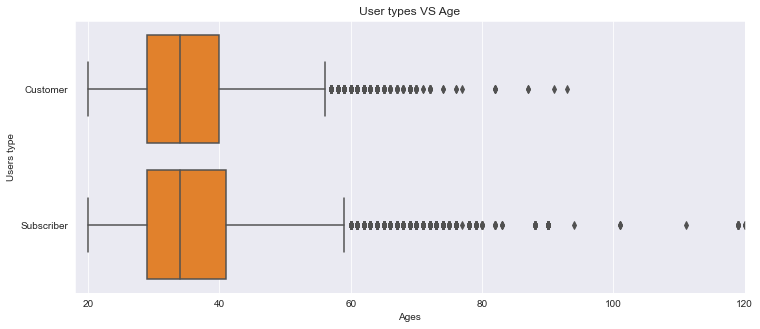

In [11]:
# Plotting boxplots to show relation between user type and age, also i will crop the age range from 18 to 100 years
sb.boxplot(data = ford_bike_share, y = "user_type", x = "user_age", color = base_color, orient= "h")
plt.xlim([18, 120])
plt.ylabel("Users type")
plt.xlabel("Ages")
plt.title("User types VS Age")
plt.show();

> **Visual insight:**

**Subscribers**

seem not only slightly older than customers, but also they have a wider range of ages as well.

### 4- User type Vs Gender:

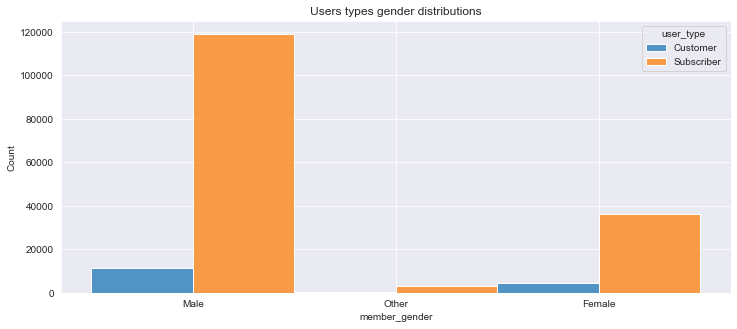

In [12]:
# Plotting hist catplots and using colors to demonestrate the distribution of each gender 
sb.histplot(data=ford_bike_share, binwidth=0.5,
             x="member_gender", hue="user_type",
             stat="count", multiple="dodge", cbar= True);
plt.title("Users types gender distributions");

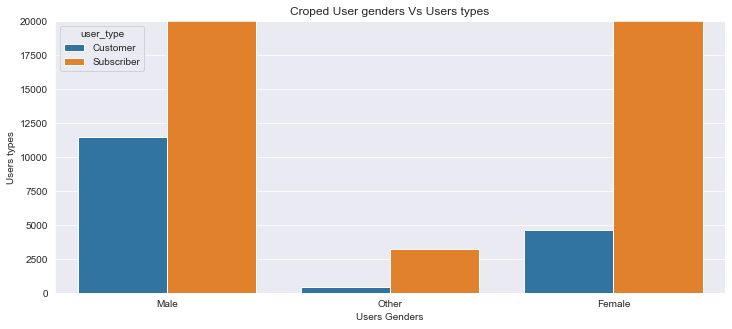

In [13]:
# Plotting croped countplot to compare numbers of users throw the every gender
sb.countplot(data=ford_bike_share, x="member_gender", hue="user_type");
plt.xlabel("Users Genders");
plt.ylabel("Users types")
plt.ylim(0, 20000)
plt.title("Croped User genders Vs Users types");

> **Visual insight:**

**Subscribers**

seem more diversitive, they are males ,females and other, also customers have the same diversity: males and females with slightly higher proportion for females than the subscribers.

## Multivariate Exploration
- User types Vs Ages Vs Genders.

- Ages Vs Genders Vs Durations per minutes.

### 1- User type VS Users ages VS Genders :

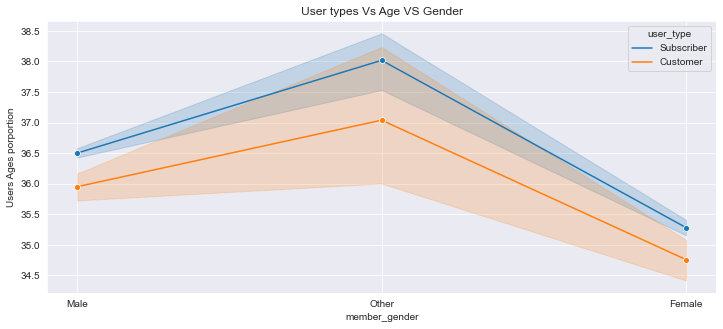

In [14]:
# plotting lineplot to crop the image of relation between user types and age and gender:
sb.lineplot(data = ford_bike_share, x="member_gender", y="user_age", hue="user_type",
            hue_order= ford_bike_share["user_type"].value_counts().index ,
            marker='o', sort= True, ci= 99)
ticks= ford_bike_share.member_gender.value_counts().index
plt.xticks(ticks, ticks)
plt.ylabel("Users Ages porportion")
plt.title("User types Vs Age VS Gender");

> **Visual insight:**

**Subscribers**

generally seem to have higher rates of ages among all types of genders, also females generally seem to be among younger subscribers and customers. we can have a deeper look in the following graph.

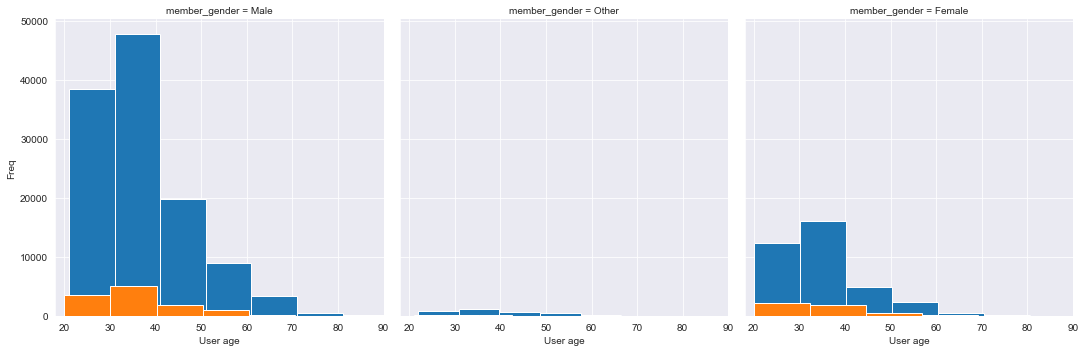

In [15]:
# Plot the Seaborn's FacetGrid to have a deeper look on age , gender and user type:

g = sb.FacetGrid(data = ford_bike_share, col = "member_gender", sharex=True,
               sharey=True, aspect=1, height=5,
                hue= "user_type", hue_order= ford_bike_share["user_type"].value_counts().index,
                col_wrap= 3, legend_out= False,
                 xlim=(18, 90),  margin_titles=True
                );
g.map(plt.hist, "user_age");
g.set_xlabels("User age");
g.set_ylabels("Freq");

> Visual insight:

- Generally the range of ages of males ages is ( 20-60) for subscribers and suctomers, while most of "other" gender type subscribers in range ( 22- 58), also females in range (20 - 60) for both subscribers and customers same as males.

- I will separate the users' counts of each gender type to have a deeper look. 

### Another plot to have a deeper look on age , gender and user type


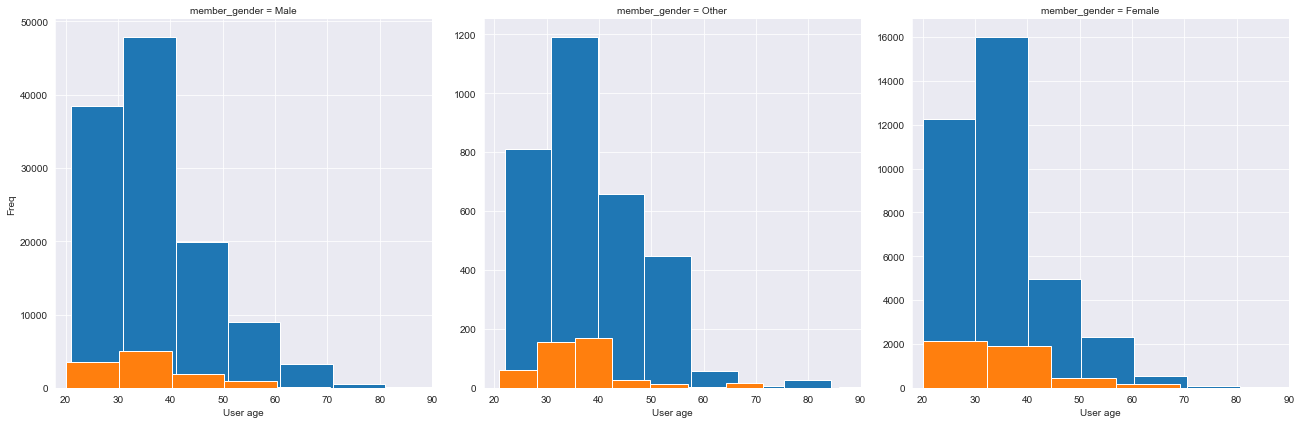

In [16]:
g = sb.FacetGrid(data = ford_bike_share, col = "member_gender", sharex=True,
               sharey=False, aspect=1, height=6,
                hue= "user_type", hue_order= ford_bike_share["user_type"].value_counts().index,
                col_wrap= 3, legend_out= False,
                 xlim=(18, 90),  margin_titles=True);
g.map(plt.hist, "user_age");
g.set_xlabels("User age");
g.set_ylabels("Freq");

> **Visual insight:**

- Customers with genders types: Male and Other. seem slightly younger than subscribers with the same types, while both subscribers and customers females have the same younger ages ranges.

- Female customers in range (20-30) seems to be the peak of female customers while female subscribers peak seems to be in range (30-40) same as males customers and subscribers also same as "other" gender type peak.

### 2- Users ages VS Genders VS Duration :

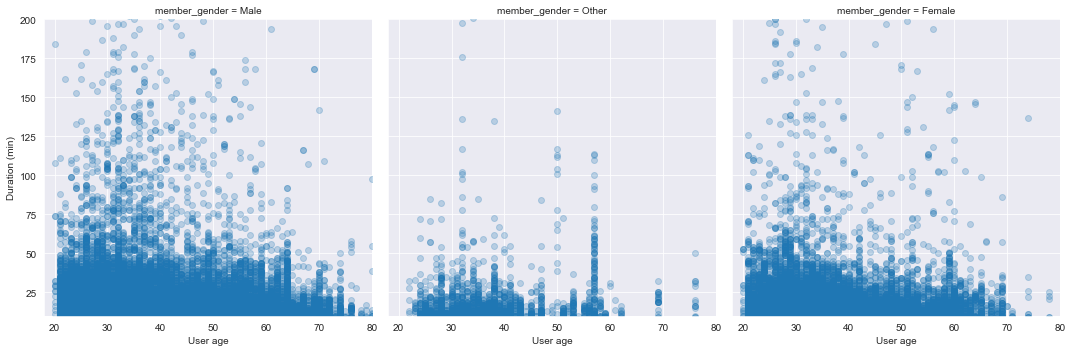

In [17]:
user_type = sb.FacetGrid(data = ford_bike_share, col = "member_gender", col_wrap = 3, size = 5,
                 xlim = [18, 80], ylim = [10, 200])
user_type.map(plt.scatter, "user_age", "duration_in_minutes", alpha=0.25)
user_type.set_xlabels("User age")
user_type.set_ylabels("Duration (min)");

> **Visual insight:**

- Generally both Males and females in range (20-60) have the same pattern of trips durations (right skewed curve shape) which means that length of trip duration has inversely proportional relationship with Age while the "other" type gender has a unique bimodal pattern (has two peaks in range (30-40) and range (55-60). 

i will crop the graph to have a deeper understanding of these patterns.

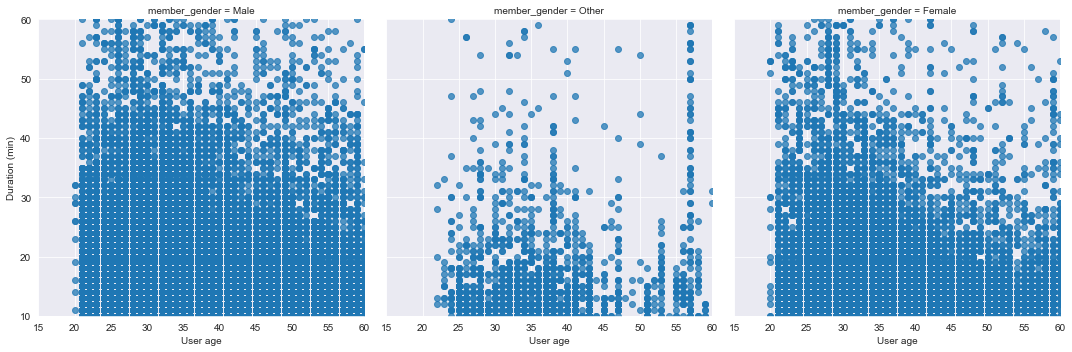

In [18]:
# Adjusting the previous plot:
user_type = sb.FacetGrid(data = ford_bike_share, col = "member_gender", col_wrap = 3, size = 5,
                 xlim = [15, 60], ylim = [10, 60], sharex=[False])
user_type.map(plt.scatter, "user_age", "duration_in_minutes", alpha=0.75)
user_type.set_xlabels("User age")
user_type.set_ylabels("Duration (min)");

> **Visual insight:**

- Males trips durations last for more than (35 minutes) length in range (20-53) years old, while femals' lasts for the same length in range (20-45) years old. also both males and females trips durations last for (20 minutes) length in the same age range (20-60) years old.

- "Other" gender type has a unique dual pattern, durations of trips mostly last for (20 minutes) in range (24- 41) years old, but in range (55-60) years old surprisingly trips durations lasts for more than (50 minutes) , which seems an outlier for the "Other" gender type but it seem normal pattern as it is for both males and females.


The next graph will focus on outliers and special cases.

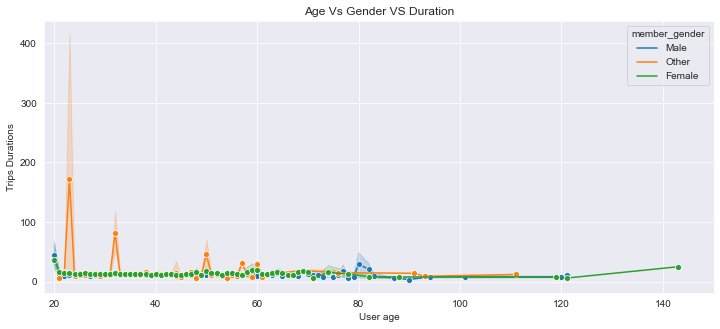

In [19]:
# Plotting linplot to demonstrate outliers of usage patterns:

sb.lineplot(data = ford_bike_share, x="user_age",
            y="duration_in_minutes",
            hue="member_gender", marker='o')
plt.xlim(18, 150)

plt.xlabel("User age");
plt.ylabel("Trips Durations");
plt.title("Age Vs Gender VS Duration");

> **Visual insight:**

- Generally "Other" gender type has the longest trip durations which can last for (400) minutes
- Users older than (100 years old) almost females and "Other"s gender type.

In the following graph i will crop more to focus on longest trips durations.

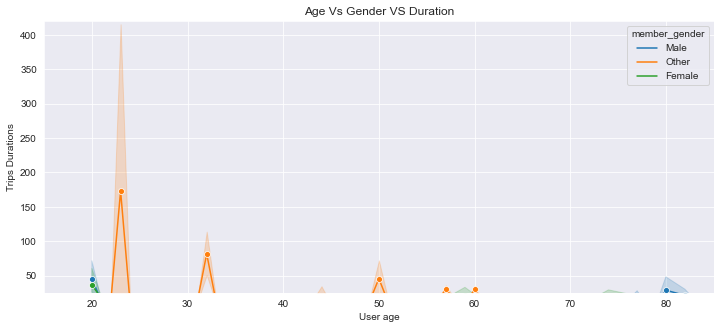

In [20]:
# Plotting lineplot but i will raise the trip duration range to start from 25 minutes and will decrease the age range to 85:
sb.lineplot(data = ford_bike_share, x="user_age", y="duration_in_minutes", hue="member_gender", marker='o')
plt.xlim(15, 85)
plt.ylim(25, 420)
plt.ylabel("Trips Durations");
plt.xlabel("User age");
plt.title("Age Vs Gender VS Duration");

> **Visual insight:**

- It is obvious that the "Other" gender type has the longest trip durations which can last for (400) minutes and has the majority of longer than (40 minutes) trips durations.

In the following graph i will crop more to focus on oldest users.

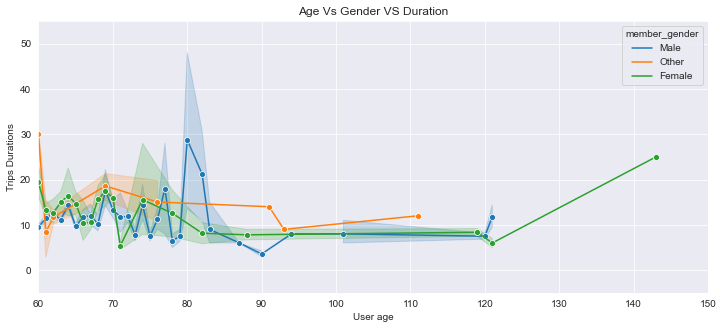

In [26]:
# Same lineplot with adjusted age range and trips durations:
sb.lineplot(data = ford_bike_share, x="user_age", y="duration_in_minutes", hue="member_gender", marker='o')
plt.xlim(60, 150)
plt.ylim(-5, 55)

plt.xlabel("User age")
plt.ylabel("Trips Durations")
plt.title("Age Vs Gender VS Duration");

> **Visual insight:**

- All of member gender types trips durations lasts for (30 minutes) in range (60-80) years old.
- Males has the longest trips durations in range (77 - 83) years old with more than (40 minutes) durations length.
- Female users are the majority of users older than (90) years old with the longest trips durations (almost 25 minutes).

**IN General** we can say:

- Relationships between multiple variables which plotted are visualized altogether and information are presented combined. Thus I found that “Multivariate exploration” strengthened some of relationships that observed in the previous “Bivariate exploration” also in the “Univariate exploration”.

- Short periods Usage (10-30 minutes) for younger users (20-40 years old) pattern seems correlated to subscriber and younger female customers on workdays specially on rush hours, which supports the "going to work" Hypothesis as a main purpose for using "ford go bike" service.

- Meduim and longer periods usage pattern for both subscribers and customers seems correlated to relaxing and sporting purpose specially with the eldest users.

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!

In [27]:
!jupyter nbconvert slide_deck_template.ipynb --to slides --no-input

[NbConvertApp] Converting notebook slide_deck_template.ipynb to slides
[NbConvertApp] Writing 1263954 bytes to slide_deck_template.slides.html
